## Loan Prediction

### Steps to solve machine learning projects (classification project)
For classification problems, you should primarily consider the distribution of your features (predictor variables) rather than the response variable. Some important points to keep in mind:
1 Class Distribution:
Check the balance of classes in your response variable. Imbalanced classes can affect model performance.

2 Feature Distribution:
Examine the distribution of your predictor variables. Are they approximately symmetric or skewed?

3 Outliers:
Identify outliers in your data that could impact the classification model.

4 Feature Scaling:
Certain classification algorithms may benefit from feature scaling to ensure that features are on similar scales.

5 Feature Engineering:
Create new features or preprocess existing ones to capture relevant information for classification.

6 Model Evaluation:
Use appropriate classification metrics like accuracy, precision, recall, F1-score, ROC curve, and AUC to assess model performance.

7 Cross-Validation:
Implement cross-validation techniques to evaluate your classification model's performance on different subsets of the data.




In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#numarical variables - 5
#categorical variables - 8

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# missing values are not much . we can replace or we can also drop them .

In [9]:
df.describe()   

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [11]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## data preprocessing

In [13]:
# handle numerical missing data

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [15]:
# handle categorical missing data

In [16]:

df['Gender'].mode()[0]

'Male'

In [17]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [18]:
# now we will print if there is any missing values or not?

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exloratory data anlysis

In [20]:
# categorical data

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

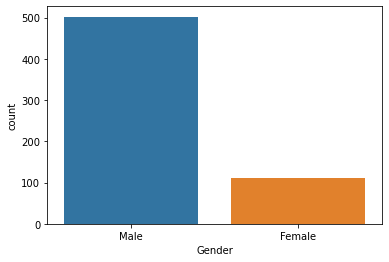

In [21]:

import seaborn as sns
sns.countplot(df['Gender'])

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

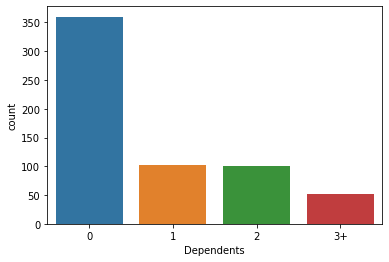

In [22]:
sns.countplot(df.Dependents)

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

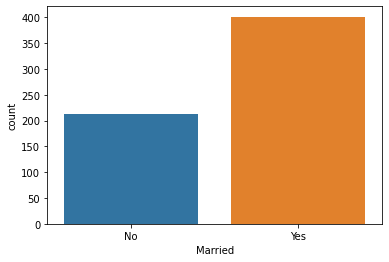

In [23]:
sns.countplot(df.Married)

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

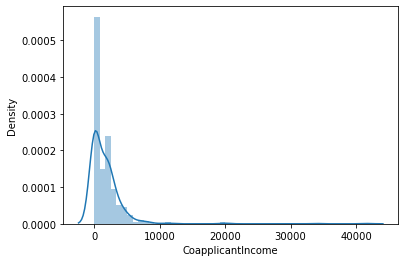

In [25]:
# numerical data
sns.distplot(df.CoapplicantIncome)

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

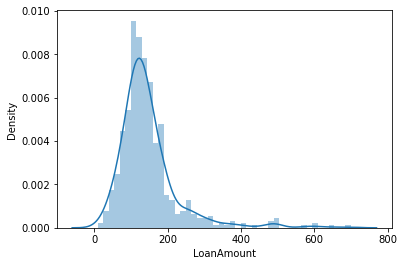

In [26]:
sns.distplot(df.LoanAmount)

C:\Users\win8.1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

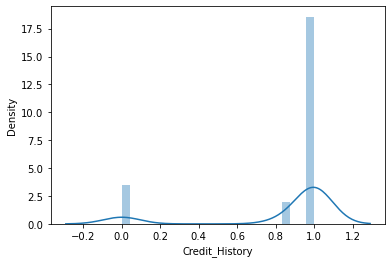

In [27]:
sns.distplot(df.Credit_History)

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [29]:
# there is two income columns we will make one from adding both

In [30]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [32]:
# Checking data is imbalance or not?

In [33]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [34]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [35]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

In [36]:
# Synthetic Minority Over-sampling Technique (SMOTE) generate synthetic instances of the minority class to balance the dataset

In [37]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate features and target variable
X = df.drop("Loan_Status", axis=1)  # Features
y = df["Loan_Status"]  # Target variable

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after oversampling
print(resampled_df["Loan_Status"].value_counts())


Y    422
N    422
Name: Loan_Status, dtype: int64


In [38]:
resampled_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,5849.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,6000.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,9613.0,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,3849.0,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,5540.0,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,5532.0,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,23809.0,N


In [39]:
resampled_df.shape

(844, 14)

In [40]:
resampled_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_income         0
Loan_Status          0
dtype: int64

In [41]:
# categorical variables ( creating dummies)

In [42]:
d1 = pd.get_dummies(resampled_df['Gender'], drop_first= True)
d2 = pd.get_dummies(resampled_df['Married'], drop_first= True)
d3 = pd.get_dummies(resampled_df['Dependents'], drop_first= True)
d4 = pd.get_dummies(resampled_df['Education'], drop_first= True)
d5 = pd.get_dummies(resampled_df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(resampled_df['Property_Area'], drop_first= True)



resampled_df = pd.concat([resampled_df, d1, d2, d3, d4, d5, d6], axis = 1)




In [43]:
cols = ['Loan_ID','Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area','ApplicantIncome','CoapplicantIncome']
df_final = resampled_df.drop(columns=cols, axis=1)

In [44]:
df_final

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,146.412162,360.0,1.000000,5849.0,Y,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.000000,6091.0,N,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.000000,3000.0,Y,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.000000,4941.0,Y,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.000000,6000.0,Y,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,146.412162,180.0,1.000000,3992.0,N,1,1,0,0,1,1,0,0,1
840,61.000000,360.0,0.842199,1880.0,N,1,1,1,0,0,0,0,0,0
841,146.000000,360.0,0.000000,4704.0,N,1,1,1,0,0,0,0,0,0
842,45.000000,180.0,0.000000,2889.0,N,1,1,0,1,0,1,0,0,1


In [45]:
df_final.shape

(844, 14)

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoanAmount        844 non-null    float64
 1   Loan_Amount_Term  844 non-null    float64
 2   Credit_History    844 non-null    float64
 3   Total_income      844 non-null    float64
 4   Loan_Status       844 non-null    object 
 5   Male              844 non-null    uint8  
 6   Yes               844 non-null    uint8  
 7   1                 844 non-null    uint8  
 8   2                 844 non-null    uint8  
 9   3+                844 non-null    uint8  
 10  Not Graduate      844 non-null    uint8  
 11  Yes               844 non-null    uint8  
 12  Semiurban         844 non-null    uint8  
 13  Urban             844 non-null    uint8  
dtypes: float64(4), object(1), uint8(9)
memory usage: 40.5+ KB


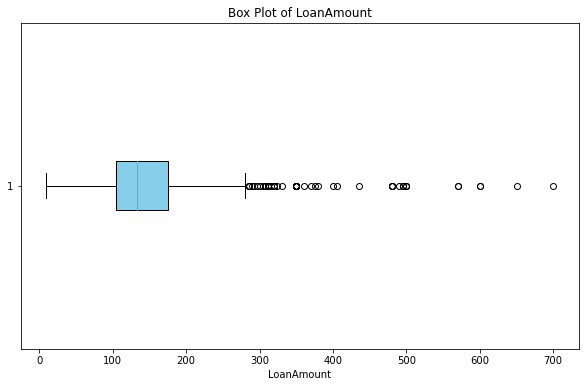

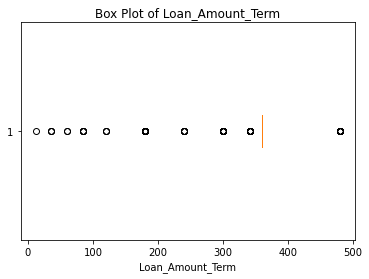

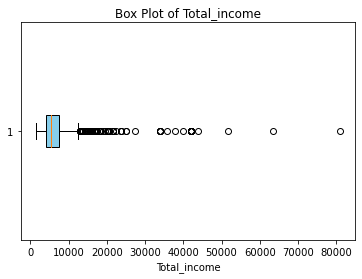

In [47]:
numeric_cols = ['LoanAmount', 'Loan_Amount_Term', 'Total_income']
df_final[numeric_cols] = df_final[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Set colors for the box plots
box_colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create separate colorful box plots for each numerical variable
plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_cols):
    box_plot = plt.boxplot(df_final[col], vert=False, patch_artist=True)
    for patch, color in zip(box_plot['boxes'], box_colors):
        patch.set_facecolor(color)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [48]:
df_final.tail()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
839,146.412162,180.0,1.000000,3992.0,N,1,1,0,0,1,1,0,0,1
840,61.000000,360.0,0.842199,1880.0,N,1,1,1,0,0,0,0,0,0
841,146.000000,360.0,0.000000,4704.0,N,1,1,1,0,0,0,0,0,0
842,45.000000,180.0,0.000000,2889.0,N,1,1,0,1,0,1,0,0,1
843,98.000000,360.0,0.000000,4166.0,N,1,0,0,0,0,0,0,1,0


In [ ]:
###################################################################skip########################

In [ ]:
# data transformation

In [ ]:
# df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

In [ ]:
sns.distplot(df.ApplicantIncomeLog)

In [ ]:
#df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
# sns.distplot(df["ApplicantIncomeLog"])

In [ ]:
#df['LoanAmountLog'] = np.log(df['LoanAmount'])
#sns.distplot(df["LoanAmountLog"])

In [ ]:
#df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
#sns.distplot(df["Loan_Amount_Term_Log"])

In [ ]:
#df['Total_Income_Log'] = np.log(df['Total_income'])
#sns.distplot(df["Total_Income_Log"])

In [ ]:
# checking normality

import statsmodels.api as sm
from scipy import stats

response_variable = df["Total_Income_Log"]

# Plot a histogram of the response variable
plt.figure(figsize=(8, 6))
plt.hist(response_variable, bins=20, edgecolor='k')
plt.title(' Variable  Histogram')
plt.xlabel('variable')
plt.ylabel('Frequency')
plt.show()

# Create a QQ plot for the response variable
plt.figure(figsize=(8, 6))
sm.qqplot(response_variable, line='s')  # 's' for standardized line
plt.title('QQ Plot of  Variable')
plt.show()

# Perform a Shapiro-Wilk normality test for the response variable
shapiro_test_statistic, shapiro_p_value = stats.shapiro(response_variable)
print("Shapiro-Wilk Test forVariable:")
print("Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)
if shapiro_p_value < 0.05:
    print("The  variable is not normally distributed (reject H0)")
else:
    print("The  variable is normally distributed (fail to reject H0)")


In [ ]:
df.head()

In [ ]:
# cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
# df = df.drop(columns=cols, axis=1)

In [ ]:
# df.head()

In [ ]:
df.info()

### handling categorical data

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
# for col in cols:
#     df[col] = pd.get_dummies(df[col], drop_first= True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
################################################################skip##############

In [50]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,7024.705081
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [49]:
# test datasets

In [50]:
test = pd.read_csv("test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
# test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

# test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

# test['LoanAmountLog'] = np.log(test['LoanAmount'])

# test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

# test['Total_Income_Log'] = np.log(test['Total_income'])

#cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
#test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)





In [51]:
df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

In [52]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_income,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,...,5720,1,1,0,0,0,0,0,0,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,...,4576,1,1,1,0,0,0,0,0,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,...,6800,1,1,0,1,0,0,0,0,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,...,4886,1,1,0,1,0,0,0,0,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,...,3276,1,0,0,0,0,1,0,0,1


In [53]:
cols = ['Loan_ID','Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area','ApplicantIncome','CoapplicantIncome']
test = test.drop(columns=cols, axis=1)


In [54]:
test.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,110.0,360.0,1.000000,5720,1,1,0,0,0,0,0,0,1
1,126.0,360.0,1.000000,4576,1,1,1,0,0,0,0,0,1
2,208.0,360.0,1.000000,6800,1,1,0,1,0,0,0,0,1
3,100.0,360.0,0.825444,4886,1,1,0,1,0,0,0,0,1
4,78.0,360.0,1.000000,3276,1,0,0,0,0,1,0,0,1


### split datasets

In [55]:
df_final.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,146.412162,360.0,1.0,5849.0,Y,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,6091.0,N,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,3000.0,Y,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,4941.0,Y,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,6000.0,Y,1,0,0,0,0,0,0,0,1


In [56]:
# specify input and output attributes
x = df_final.drop(columns=['Loan_Status'], axis=1)
y = df_final['Loan_Status']

In [57]:
x

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,146.412162,360.0,1.000000,5849.0,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.000000,6091.0,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.000000,3000.0,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.000000,4941.0,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.000000,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,146.412162,180.0,1.000000,3992.0,1,1,0,0,1,1,0,0,1
840,61.000000,360.0,0.842199,1880.0,1,1,1,0,0,0,0,0,0
841,146.000000,360.0,0.000000,4704.0,1,1,1,0,0,0,0,0,0
842,45.000000,180.0,0.000000,2889.0,1,1,0,1,0,1,0,0,1


In [58]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [60]:
x_train.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
425,121.0,360.0,1.0,6966.0,1,1,0,0,0,0,0,0,0
660,81.0,360.0,1.0,4606.0,0,0,1,0,0,1,0,0,0
417,239.0,360.0,1.0,21600.0,1,1,0,1,0,0,1,0,1
759,66.0,300.0,0.0,2178.0,1,1,1,0,0,0,1,0,0
90,131.0,360.0,1.0,5858.0,1,1,0,0,0,0,0,1,0


In [61]:
y_test.head()

493    Y
215    Y
622    N
737    N
63     N
Name: Loan_Status, dtype: object

In [62]:
# model training

In [63]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 86.25592417061611


In [65]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 84.83412322274881


In [66]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model3 = LogisticRegression()
model3.fit(x_train, y_train)

# Evaluate the model's accuracy on the test data
accuracy = model3.score(x_test, y_test) * 100
print("Accuracy is", accuracy)


Accuracy is 70.61611374407583


In [67]:
# confusion matrics

In [68]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[99, 15],
       [14, 83]], dtype=int64)

In [69]:
# model save

In [70]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)

In [72]:
model = pickle.load(open('model.pkl','rb'))

In [73]:
model

RandomForestClassifier()